# Classification task using a perceptron
---
Here we create a dataset of N variables, with the two variables X1 and X2.
Each variable has class 1, 2 and 3.
The class distribution for the variable X1 is:
- class 1: a normal distribution
- class 2: a normal distribution
- class 3: a normal distribution

The class distribution for the variable X2 is:
- class 1: exponential distribution
- class 2: lognormal distribution
- class 3: poisson distribution

each class has a label y attached 

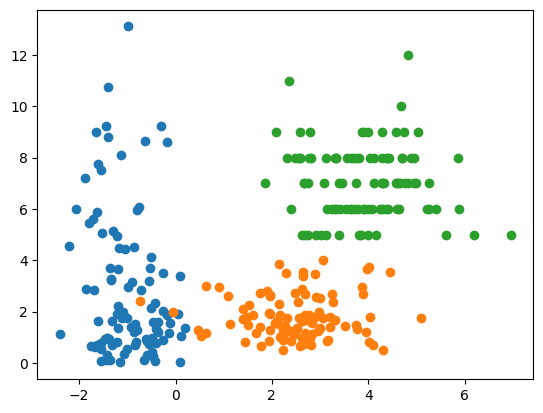

In [64]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# generate N points per class
N = 100

# generating points for the first class
# normal distributions. loc is the mean, scale is the stddev
X1_1 =  np.random.normal(loc=-1, scale=0.5, size=N)
X1_2 =  np.random.normal(loc=2.5, scale=1, size=N)
X1_3 =  np.random.normal(loc=4, scale=1, size=N)

# generating points for the second class
# exponential distribution, the scale is the inverse of the rate
X2_1 = np.random.exponential(scale=3, size=N)
# lognormal distribution. sigma is the stddev
X2_2 = np.random.lognormal(mean=0.5, sigma=0.5, size=N)
# poisson distribution
X2_3 = np.random.poisson(lam=2, size=N) + 5

# generating the labels 1,2,3 to associate to the data
Y1 = np.ones(N) * 1
Y2 = np.ones(N) * 2
Y3 = np.ones(N) * 3

# We need the coordinate X0 for the bias term
X0 = np.ones(N*3)

# Here we create a matrix of points X (each row is an object) and a vector y of labels.
X = np.stack((X0, np.concatenate((X1_1, X1_2, X1_3)), np.concatenate((X2_1, X2_2, X2_3))), axis=1)
Y = np.concatenate((Y1, Y2, Y3))

# plotting the first feature
plt.scatter(X1_1, X2_1)
# plotting the second feature
plt.scatter(X1_2, X2_2)
# plotting the third feature
plt.scatter(X1_3, X2_3)

### Choose a category
We want to train a binary classifier for class 3.

To this purpose we create a vector of labels Y_class that contains 1 for each object belonging to the class under study (positive class) and -1 for all the other objects.

In this way we can transform a multi class classification problem into a binary classification problem.

If we measure the classifier in terms of attaching the correct labels in this situation there are more negative labels than positive ones.

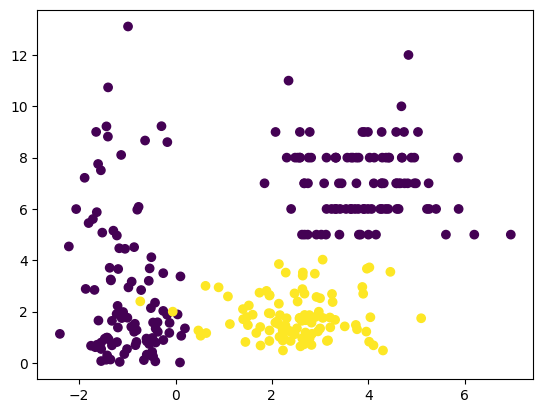

In [65]:
positive_class = 2
Y_class = - np.ones(Y.shape[0])
Y_class[Y == positive_class] = 1

# X[:,n] plots the n-th feature
plt.scatter(X[:,1], X[:,2], c = Y_class)

### Train the perceptron with a mini-batch SGD (Stochastic Gradient Descent)
In batch gradient descent, we calculate the gradient of the cost function with respect to the parameters using the entire training dataset. This is computationally expensive and may not converge to the optimal solution.

In SGD, we calculate the gradient of the cost function with respect to the parameters using a single training example. This is computationally efficient, but it may not converge to the optimal solution due to the randomness of the single example.

MBSGD combines the advantages of both batch gradient descent and SGD. Instead of using the entire training dataset or a single training example, we use a small batch of training examples in each iteration. This reduces the computational cost while maintaining the stochastic nature of SGD.

# of errors = 23.0


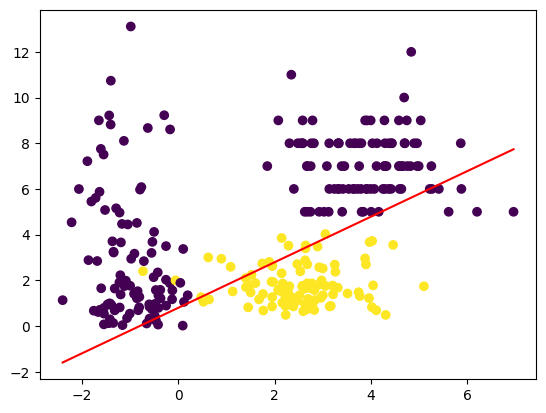

In [66]:
# the function takes the data matrix X, the labels Y and the vector of parameters w
# and computes the error in terms of sum of squares.
def sse(X, Y, W):
    return np.sum(np.square(Y - np.dot(X, W)))


# generate the weights with a random uniform distribution
# size 3 because we have 3 classes, X0, X1 and X2
W = np.random.uniform(low=-1, high=1, size=3)

# set the learning rate 0 < eta <= 1
eta = 1e-3
batch_size = 5
max_epochs = 100

# track the total error per epoch and the errors per epochs
sse_epoch = np.zeros(max_epochs + 1)
errors_epoch = np.zeros(max_epochs + 1)

for epoch in range(max_epochs):
    sse_epoch[epoch] = sse(X, Y, W)
    errors_epoch[epoch] = sum((Y_class * np.sign(np.dot(X, W))) < 0)

    # generate a random permutation
    # we shuffle points to see them in different order in the mini batch learning
    rand_perm = np.random.permutation(range(Y_class.shape[0]))
    X = X[rand_perm, :]
    Y_class = Y_class[rand_perm]

    # mini-batch learning
    for j in range(0, Y_class.shape[0], batch_size):
        X_batch = X[j : (j + batch_size), :]
        Y_batch = Y_class[j:(j+batch_size)]
        errors = Y_batch - np.dot(X_batch, W) # amount of errors
        W = W + eta * np.dot(X_batch.T, errors) # gradient descent

    sse_epoch[epoch + 1] = sse(X, Y_class, W)
    errors_epoch[epoch + 1] = sum(Y_class * np.sign(np.dot(X,W)) < 0)

print("# of errors = " + str(errors_epoch[-1]))

plt.scatter(X[:, 1], X[:, 2], c=Y_class)
plt.plot([np.min(X[:, 1]), np.max(X[:, 1])], 
         [np.min(X[:, 1]) * (-W[1]/W[2]) - W[0]/W[2], np.max(X[:, 1]) * (-W[1]/W[2]) - W[0]/W[2]],
        c = "red")

### Plot number of errors per epoch

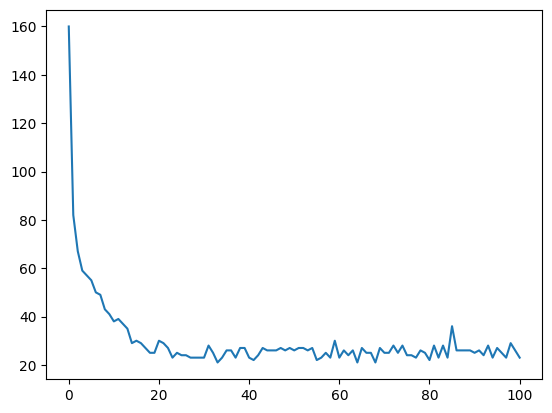

In [67]:
plt.plot(range(max_epochs + 1), errors_epoch)